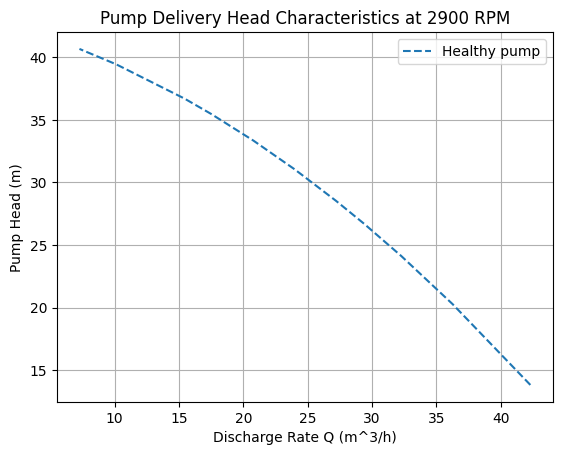

In [1]:
import requests
import scipy.io
import matplotlib.pyplot as plt

# Download the .mat file
url = 'https://www.mathworks.com/supportfiles/predmaint/fault-diagnosis-of-centrifugal-pumps-using-steady-state-experiments/PumpCharacteristicsData.mat'
response = requests.get(url)
with open('PumpCharacteristicsData.mat', 'wb') as file:
    file.write(response.content)

# Load the data from the .mat file
data = scipy.io.loadmat('PumpCharacteristicsData.mat')
Q0 = data['Q0'].flatten()
H0 = data['H0'].flatten()
M0 = data['M0'].flatten()

# Plot the data
plt.figure()
plt.plot(Q0, H0, '--')
plt.xlabel('Discharge Rate Q (m^3/h)')
plt.ylabel('Pump Head (m)')
plt.title('Pump Delivery Head Characteristics at 2900 RPM')
plt.grid(True)
plt.legend(['Healthy pump'])
plt.show()


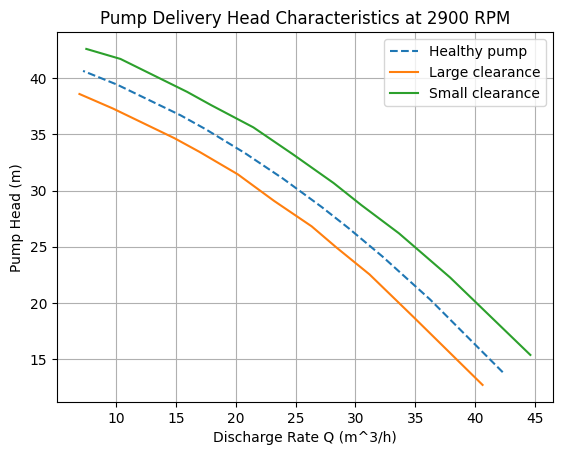

In [2]:
import scipy.io
import matplotlib.pyplot as plt

# Load the data from the .mat file
data = scipy.io.loadmat('PumpCharacteristicsData.mat')
Q0 = data['Q0'].flatten()
H0 = data['H0'].flatten()
M0 = data['M0'].flatten()
Q1 = data['Q1'].flatten()
H1 = data['H1'].flatten()
M1 = data['M1'].flatten()
Q2 = data['Q2'].flatten()
H2 = data['H2'].flatten()
M2 = data['M2'].flatten()

# Plot the data
plt.figure()
plt.plot(Q0, H0, '--', label='Healthy pump')
plt.plot(Q1, H1, label='Large clearance')
plt.plot(Q2, H2, label='Small clearance')
plt.xlabel('Discharge Rate Q (m^3/h)')
plt.ylabel('Pump Head (m)')
plt.title('Pump Delivery Head Characteristics at 2900 RPM')
plt.grid(True)
plt.legend()
plt.show()


In [3]:
# Preliminary Analysis: Comparing parameter values

import numpy as np
import pandas as pd

# Assuming linearFit is a custom function you have defined.
# Here is a placeholder for the linearFit function.
def linearFit(dummy, params):
    w, Q, H, M = params
    # Example implementation, replace with your actual linear fit logic
    hnn = np.polyfit(Q, H, 2)[0]
    hnv = np.polyfit(Q, H, 2)[1]
    hvv = np.polyfit(Q, H, 2)[2]
    k0 = np.random.random()  # Placeholder value
    k1 = np.random.random()  # Placeholder value
    k2 = np.random.random()  # Placeholder value
    return hnn, hnv, hvv, k0, k1, k2

w = 2900  # RPM

# Healthy pump
hnn_0, hnv_0, hvv_0, k0_0, k1_0, k2_0 = linearFit(0, [w, Q0, H0, M0])
# Pump with large clearance
hnn_1, hnv_1, hvv_1, k0_1, k1_1, k2_1 = linearFit(0, [w, Q1, H1, M1])
# Pump with small clearance
hnn_2, hnv_2, hvv_2, k0_2, k1_2, k2_2 = linearFit(0, [w, Q2, H2, M2])

X = np.array([[hnn_0, hnn_1, hnn_2],
              [hnv_0, hnv_1, hnv_2],
              [hvv_0, hvv_1, hvv_2]]).T

df = pd.DataFrame(X, columns=['hnn', 'hnv', 'hvv'],
                  index=['Healthy', 'Large Clearance', 'Small Clearance'])
print(df)

                      hnn       hnv        hvv
Healthy         -0.010421 -0.249829  43.029292
Large Clearance -0.011082 -0.242499  40.780027
Small Clearance -0.009466 -0.245817  45.142030


In [4]:
import numpy as np
import pandas as pd

# Assuming that k0_0, k0_1, k0_2, k1_0, k1_1, k1_2, k2_0, k2_1, k2_2
# are already defined as per the previous code section where linearFit was used.

# Construct the array Y
Y = np.array([[k0_0, k0_1, k0_2],
              [k1_0, k1_1, k1_2],
              [k2_0, k2_1, k2_2]]).T

# Create a DataFrame to display the results
df_Y = pd.DataFrame(Y, columns=['k0', 'k1', 'k2'],
                    index=['Healthy', 'Large Clearance', 'Small Clearance'])

# Print the DataFrame
print(df_Y)


                       k0        k1        k2
Healthy          0.494905  0.660417  0.465420
Large Clearance  0.736362  0.487436  0.125829
Small Clearance  0.385742  0.626734  0.082329


In [22]:
# Incorporating Uncertainty

import requests
import scipy.io
import matplotlib.pyplot as plt

# Download the .mat file
url = 'https://www.mathworks.com/supportfiles/predmaint/fault-diagnosis-of-centrifugal-pumps-using-steady-state-experiments/FaultDiagnosisData.mat'
response = requests.get(url)
with open('FaultDiagnosisData.mat', 'wb') as file:
    file.write(response.content)

# Load the data from the .mat file
data = scipy.io.loadmat('FaultDiagnosisData.mat')
HealthyEnsemble = data['HealthyEnsemble']
# HealthyEnsemble = pd.DataFrame(data['HealthyEnsemble'])

print(HealthyEnsemble[0])
# Extract Head and Discharge data
# H = [x['Head'][0,0].flatten() for x in HealthyEnsemble]
# Q = [x['Discharge'][0,0].flatten() for x in HealthyEnsemble]

# Plot the data
# plt.figure()
# plt.plot(np.concatenate(Q), np.concatenate(H), 'k.')
# plt.title('Pump Head Characteristics Ensemble for 5 Test Runs')
# plt.xlabel('Flow rate (m^3/h)')
# plt.ylabel('Pump head (m)')
# plt.show()

[MatlabOpaque([(b'', b'MCOS', b'timetable', array([[3707764736],
                      [         2],
                      [         1],
                      [         1],
                      [        81],
                      [         8]], dtype=uint32))             ],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')])]


In [ ]:
# Error handling:

import scipy.io

# Load the data from the .mat file
data = scipy.io.loadmat('FaultDiagnosisData.mat')

# Print the structure of HealthyEnsemble
HealthyEnsemble = data['HealthyEnsemble']
print(HealthyEnsemble)


In [23]:
# -----------------------------------------------------------------------------

In [24]:
# Anomaly Detection 

import numpy as np
from scipy.io import loadmat

# Load the data from the .mat file
data = loadmat('FaultDiagnosisData.mat')
HealthyEnsemble = data['HealthyEnsemble']

def linear_fit(dummy, ensemble):
    # This is a placeholder function. Replace with the actual implementation.
    # The implementation should return HealthyTheta1 and HealthyTheta2.
    HealthyTheta1 = np.random.rand(len(ensemble), 5)  # Example shape (n_samples, n_features)
    HealthyTheta2 = np.random.rand(len(ensemble), 5)
    return HealthyTheta1, HealthyTheta2

# Call the function (assuming it's similar to what you have in MATLAB)
HealthyTheta1, HealthyTheta2 = linear_fit(1, HealthyEnsemble)

# Compute the means
meanTheta1 = np.mean(HealthyTheta1, axis=0)
meanTheta2 = np.mean(HealthyTheta2, axis=0)

# Compute the covariance matrices
covTheta1 = np.cov(HealthyTheta1, rowvar=False)
covTheta2 = np.cov(HealthyTheta2, rowvar=False)

# Output the results
print("Mean Theta1:", meanTheta1)
print("Mean Theta2:", meanTheta2)
print("Covariance Theta1:\n", covTheta1)
print("Covariance Theta2:\n", covTheta2)


Mean Theta1: [0.55811849 0.36442997 0.35095177 0.39519548 0.52177185]
Mean Theta2: [0.36628446 0.63967502 0.60753592 0.34690747 0.70903482]
Covariance Theta1:
 [[ 0.06284809  0.03229602  0.02012434 -0.0187719   0.00768125]
 [ 0.03229602  0.11484842  0.08317298 -0.05807807  0.07418962]
 [ 0.02012434  0.08317298  0.08516896 -0.06540585  0.04792657]
 [-0.0187719  -0.05807807 -0.06540585  0.05212431 -0.03488452]
 [ 0.00768125  0.07418962  0.04792657 -0.03488452  0.10718907]]
Covariance Theta2:
 [[ 0.14214945  0.03688516  0.02516817  0.05588297 -0.00877988]
 [ 0.03688516  0.03406774 -0.01069137  0.01676496  0.01941103]
 [ 0.02516817 -0.01069137  0.04072759  0.02369197 -0.03886191]
 [ 0.05588297  0.01676496  0.02369197  0.03297514 -0.01730054]
 [-0.00877988  0.01941103 -0.03886191 -0.01730054  0.04315586]]


ValueError: shapes (10000,3) and (5,5) not aligned: 3 (dim 1) != 5 (dim 0)

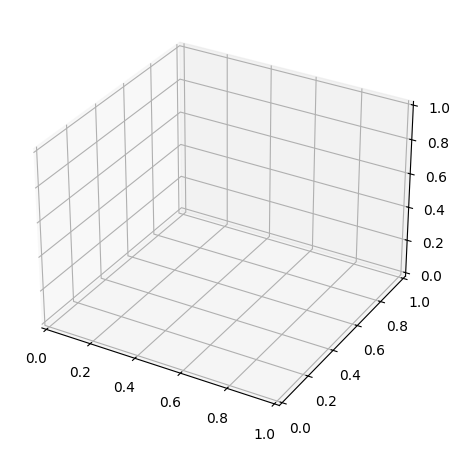

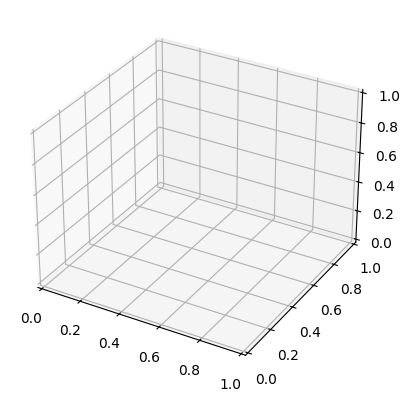

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Define or import helperPlotConfidenceEllipsoid function
def helperPlotConfidenceEllipsoid(mean, cov, scale_factor, confidence):
    # Implementation of your function to plot confidence ellipsoid
    # This is a placeholder function; you should implement or adapt it for Python

    # Example code to plot ellipsoid (replace with your actual implementation)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Generate data for ellipsoid (example)
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = scale_factor * np.outer(np.cos(u), np.sin(v))
    y = scale_factor * np.outer(np.sin(u), np.sin(v))
    z = scale_factor * np.outer(np.ones_like(u), np.cos(v))

    # Apply mean and covariance transformations (example)
    data = np.stack([x.flatten(), y.flatten(), z.flatten()], axis=1)
    mean_vector = np.array(mean)
    cov_matrix = np.array(cov)
    transformed_data = np.dot(data, np.linalg.cholesky(cov_matrix).T) + mean_vector

    # Plot ellipsoid (example)
    ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], alpha=0.6)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'2-sd Confidence Ellipsoid')

    plt.show()

# Assuming meanTheta1, covTheta1, meanTheta2, covTheta2 are defined earlier
# You would replace this with your actual mean and covariance matrices

# Plotting for meanTheta1, covTheta1
fig = plt.figure(figsize=(12, 6))

# Left subplot (1 row, 2 columns, 1st subplot)
ax1 = fig.add_subplot(121, projection='3d')
helperPlotConfidenceEllipsoid(meanTheta1, covTheta1, 2, 0.6)
ax1.set_xlabel('hnn')
ax1.set_ylabel('hnv')
ax1.set_zlabel('hvv')
ax1.set_title('2-sd Confidence Ellipsoid for Pump Head Parameters')

# Right subplot (1 row, 2 columns, 2nd subplot)
ax2 = fig.add_subplot(122, projection='3d')
helperPlotConfidenceEllipsoid(meanTheta2, covTheta2, 2, 0.6)
ax2.set_xlabel('k0')
ax2.set_ylabel('k1')
ax2.set_zlabel('k2')
ax2.set_title('2-sd Confidence Ellipsoid for Pump Torque Parameters')

plt.tight_layout()
plt.show()